    epochs  train_losses  train_accuracies  val_losses  val_accuracies  \
0      1.0      1.529923          0.615625    0.416351           0.873   
1      2.0      0.250601          0.927000    0.229524           0.916   
2      3.0      0.154800          0.954250    0.162009           0.940   
3      4.0      0.113356          0.964625    0.135608           0.955   
4      5.0      0.090430          0.971625    0.123288           0.963   
5      6.0      0.076361          0.976625    0.114561           0.968   
6      7.0      0.066914          0.979625    0.109109           0.969   
7      8.0      0.059269          0.982500    0.105038           0.971   
8      9.0      0.053242          0.983750    0.101710           0.971   
9     10.0      0.048538          0.985125    0.099977           0.971   
10    11.0      0.044405          0.985750    0.098380           0.971   
11    12.0      0.040600          0.987250    0.097781           0.972   
12    13.0      0.037342          0.98

C:\Users\nicol\AppData\Local\Temp\ipykernel_9880\3072135520.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  collected_data = pd.concat([collected_data, df], axis=0)


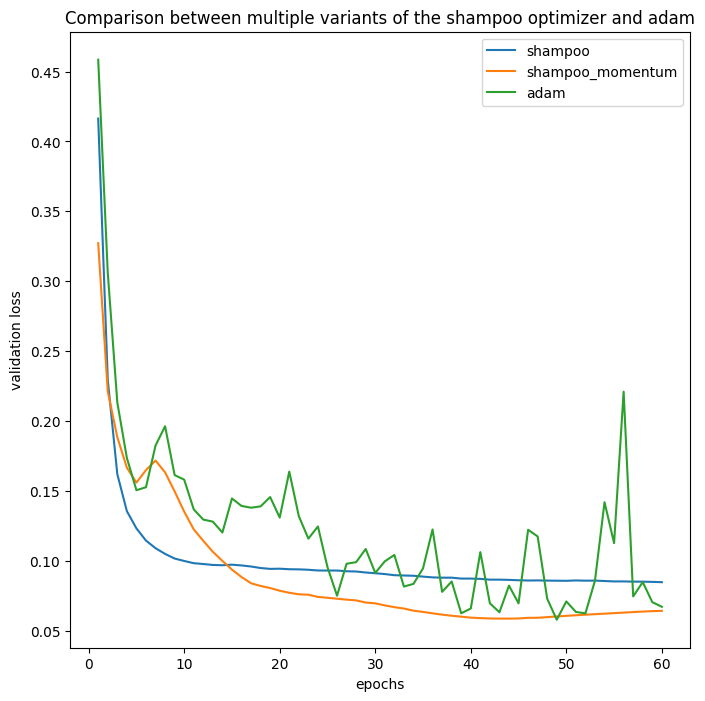

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
collected_data = pd.DataFrame(columns=["epochs", "train_losses", "train_accuracies", "val_losses", "val_accuracies", "optimizer"])
dataset = "mnist"
# "shampoo", "shampoo_diagonal", "shampoo_momentum", "shampoo_momentum_diagonal", "shampoo_heuristic", "shampoo_heuristic_diagonal", "adam"
optimizers = ["shampoo", "shampoo_momentum", "adam"] 

for optimizer in optimizers:
    path = f"metrics/metrics_{optimizer}_{dataset}.csv"
    df = pd.read_csv(path, names=["epochs", "train_losses", "train_accuracies", "val_losses", "val_accuracies"])
    df["optimizer"] = optimizer
    collected_data = pd.concat([collected_data, df], axis=0)

figure = plt.figure(figsize=(8,8))
for optimizer in optimizers:
    print(collected_data[collected_data["optimizer"]==optimizer])
    optimzer_data = collected_data[collected_data["optimizer"]==optimizer]
    plt.plot(optimzer_data["epochs"], optimzer_data["val_losses"], label = optimizer)

plt.title("Comparison between multiple variants of the shampoo optimizer and adam")
plt.xlabel("epochs")
plt.ylabel("validation loss")
plt.legend()
plt.show()
figure.savefig(f"diagrams/diagram_metrics_{dataset}.png", format="png")